In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

In [ ]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [ ]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

In [ ]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

In [ ]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

In [ ]:
# running the model through EMA workbench
#with MultiprocessingEvaluator(dike_model) as evaluator:
 #   results = evaluator.perform_experiments(scenarios=50, policies=4)

In [ ]:
# observing the simulation runs
#experiments, outcomes = results
#print(outcomes.keys())
#experiments

In [ ]:
# only works because we have scalar outcomes
#pd.DataFrame(outcomes)

In [ ]:
# defining specific policies
# for example,
# Policy 0 is a "do nothing" policy
# policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations
# policy 4 is performing all room for the river projects in first timestep
# Policy 5 is raising all dike-rings with 5 dm

# Delta Commission wants ultimate protection of drinkwater and water safety (people)

# Environmental interest group want least room for river?

# Transport company wants the best protection of roadnetwork, so wants either increase in dike height or rfr on non road networks

# Gelderland province wants rfr and money for compensation for 1 and 2, for dike ring 3 they want high dikes. Want dike ring 4 to give rfr, because small.
# dike ring 1 rural, rfr rather not, but no dikes due to drought.
# dike ring 2 rural, rfr rather not, but no dikes due to drought.
# dike ring 3 urban, higher dikes, no rfr. Might suggest recreational water, thus rfr.

# Overijssel province don't want rfr and want higher dikes near city. They want Gelderland to give rfr in 1 and 2, because it positively impacts them, makes sense due to upstream. Voor 4 is verhoging van dijken een probleem ivm watervoorziening tijdens droogte. Boeren zijn gewillig voor compensatie.
# dike ring 4 rural, want no higher dikes due to drought and no rfr due to farming, but are willing to get compensation. Rather small rfr, so probably cheap.
# dike ring 5 urban, wants higher dikes to protect city, don't have space for rfr.

# Rijkswaterstaat wants the road network to be kept in good condition and the state to keep functioning. Everyone should be accessible. Rijkswaterstaat also wants all actors to be content and also have interest in all the dike rings

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
    # Policy(
    #     "policy 1",
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
    #     )
    # ),
    # Policy(
    #     "policy 2",
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
    #     )
    # ),
    # Policy(
    #     "policy 3",
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
    #     )
    # ),
    #
    #     Policy(
    #     "policy 4",
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1,"4_RfR 0": 1}
    #     )
    # ),
        Policy(
        "Rijkswaterstaat",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1, "A.5_DikeIncrease 0":5}
        )
    ),
    #     Policy(
    #     "Delta Commission", #Delta Commission wants to spend least possible, rfr and evac, environment
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1, "A.5_DikeIncrease 0":5}
    #     )
    # ),
    #     Policy(
    #     "Environmental interest group",
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1, "4_RfR 0": 1}
    #     )
    # ),
    #     Policy(
    #     "Transport company", #against broadening the river
    #     **dict(
    #         get_do_nothing_dict(),
    #         **{"A.1_DikeIncrease 0":5,"A.2_DikeIncrease 0":5,"A.3_DikeIncrease 0":5,"A.4_DikeIncrease 0":5,"A.5_DikeIncrease 0":5}
    #     )
    # ),
        Policy(
        "Gelderland province",
        **dict(
            get_do_nothing_dict(),
            **{"A.3_DikeIncrease 0":5}
        )
    ),
            Policy(
        "Dike ring 1",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
            Policy(
        "Dike ring 2",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0":1}
        )
    ),
            Policy(
        "Dike ring 3",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0":1, "1_RfR 0":1, "A.3_DikeIncrease 0":5}
        )
    ),
        Policy(
        "Overijssel province",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0":1, "1_RfR 0":1, "2_RfR 0": 1, "A.5_DikeIncrease 0":5}
        )
    ),
            Policy(
        "Dike ring 4",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0":1, "1_RfR 0":1, "2_RfR 0": 1}
        )
    ),
            Policy(
        "Dike ring 5",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0":1, "1_RfR 0":1, "2_RfR 0": 1, "3_RfR 0": 1, "A.5_DikeIncrease 0":5}
        )
    ),
]

In [14]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 100 scenarios * 9 policies * 1 model(s) = 900 experiments
100%|████████████████████████████████████████| 900/900 [06:29<00:00,  2.31it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [15]:
experiments, outcomes = results

In [16]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.025713e+07,0.007383,9.067076e+07,0.083955,2.003526e+09,3.297030,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
1,4.969154e+07,0.039324,8.197711e+07,0.084846,8.687996e+08,1.651914,0.000000e+00,0.000000,1.698948e+08,0.164793,0.0,0.0
2,0.000000e+00,0.000000,1.510586e+07,0.012185,9.367574e+07,0.139109,2.867973e+07,0.011629,0.000000e+00,0.000000,0.0,0.0
3,0.000000e+00,0.000000,7.701064e+06,0.008579,9.494374e+07,0.192352,3.029535e+07,0.016045,0.000000e+00,0.000000,0.0,0.0
4,1.847693e+08,0.129052,6.337369e+07,0.058883,1.929759e+07,0.034598,2.056084e+06,0.001053,1.462209e+08,0.130634,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000e+00,0.000000,1.468844e+07,0.014996,1.808954e+09,3.058334,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0
896,0.000000e+00,0.000000,8.216772e+07,0.065421,0.000000e+00,0.000000,4.850905e+07,0.018724,3.667668e+07,0.000000,454300000.0,0.0
897,0.000000e+00,0.000000,5.274856e+08,0.394927,0.000000e+00,0.000000,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0
898,0.000000e+00,0.000000,2.792207e+07,0.021891,1.270615e+08,0.182513,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0


In [17]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,122,62.542624,1.0,0.745741,135.916692,10.0,0.424521,216.486034,10.0,0.021283,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,63,123.481274,1.0,0.657370,98.147694,10.0,0.486930,95.179142,1.0,0.330628,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,8,334.866885,1.0,0.864269,322.519743,1.0,0.961627,151.182754,10.0,0.714573,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,46,183.918834,1.0,0.949635,241.541955,1.0,0.956067,137.904163,1.0,0.549646,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,97,37.112433,10.0,0.544570,37.226070,1.0,0.549541,195.424891,10.0,0.742878,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,91,36.167421,1.5,0.617188,258.775860,1.5,0.825560,251.560786,10.0,0.037185,...,0,0,0,0,5,0,0,95,Dike ring 5,dikesnet
896,88,91.868397,1.0,0.365389,287.064516,1.0,0.359673,178.736662,1.5,0.992647,...,0,0,0,0,5,0,0,96,Dike ring 5,dikesnet
897,10,171.160097,1.5,0.501085,324.732246,1.0,0.098371,339.649326,1.0,0.261083,...,0,0,0,0,5,0,0,97,Dike ring 5,dikesnet
898,40,289.229117,1.5,0.252797,110.834596,10.0,0.706415,257.668946,1.0,0.357107,...,0,0,0,0,5,0,0,98,Dike ring 5,dikesnet


In [18]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [19]:
data

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,1.025713e+07,0.007383,9.067076e+07,0.083955,2.003526e+09,3.297030,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,policy 0
1,4.969154e+07,0.039324,8.197711e+07,0.084846,8.687996e+08,1.651914,0.000000e+00,0.000000,1.698948e+08,0.164793,0.0,0.0,policy 0
2,0.000000e+00,0.000000,1.510586e+07,0.012185,9.367574e+07,0.139109,2.867973e+07,0.011629,0.000000e+00,0.000000,0.0,0.0,policy 0
3,0.000000e+00,0.000000,7.701064e+06,0.008579,9.494374e+07,0.192352,3.029535e+07,0.016045,0.000000e+00,0.000000,0.0,0.0,policy 0
4,1.847693e+08,0.129052,6.337369e+07,0.058883,1.929759e+07,0.034598,2.056084e+06,0.001053,1.462209e+08,0.130634,0.0,0.0,policy 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000e+00,0.000000,1.468844e+07,0.014996,1.808954e+09,3.058334,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
896,0.000000e+00,0.000000,8.216772e+07,0.065421,0.000000e+00,0.000000,4.850905e+07,0.018724,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
897,0.000000e+00,0.000000,5.274856e+08,0.394927,0.000000e+00,0.000000,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
898,0.000000e+00,0.000000,2.792207e+07,0.021891,1.270615e+08,0.182513,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5


In [20]:
upstream = data.loc[:,['A.1 Total Costs', 'A.1_Expected Number of Deaths','A.2 Total Costs','A.2_Expected Number of Deaths','A.3 Total Costs','A.3_Expected Number of Deaths','RfR Total Costs','Expected Evacuation Costs','policy']]
upstream

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,1.025713e+07,0.007383,9.067076e+07,0.083955,2.003526e+09,3.297030,0.0,0.0,policy 0
1,4.969154e+07,0.039324,8.197711e+07,0.084846,8.687996e+08,1.651914,0.0,0.0,policy 0
2,0.000000e+00,0.000000,1.510586e+07,0.012185,9.367574e+07,0.139109,0.0,0.0,policy 0
3,0.000000e+00,0.000000,7.701064e+06,0.008579,9.494374e+07,0.192352,0.0,0.0,policy 0
4,1.847693e+08,0.129052,6.337369e+07,0.058883,1.929759e+07,0.034598,0.0,0.0,policy 0
...,...,...,...,...,...,...,...,...,...
895,0.000000e+00,0.000000,1.468844e+07,0.014996,1.808954e+09,3.058334,454300000.0,0.0,Dike ring 5
896,0.000000e+00,0.000000,8.216772e+07,0.065421,0.000000e+00,0.000000,454300000.0,0.0,Dike ring 5
897,0.000000e+00,0.000000,5.274856e+08,0.394927,0.000000e+00,0.000000,454300000.0,0.0,Dike ring 5
898,0.000000e+00,0.000000,2.792207e+07,0.021891,1.270615e+08,0.182513,454300000.0,0.0,Dike ring 5


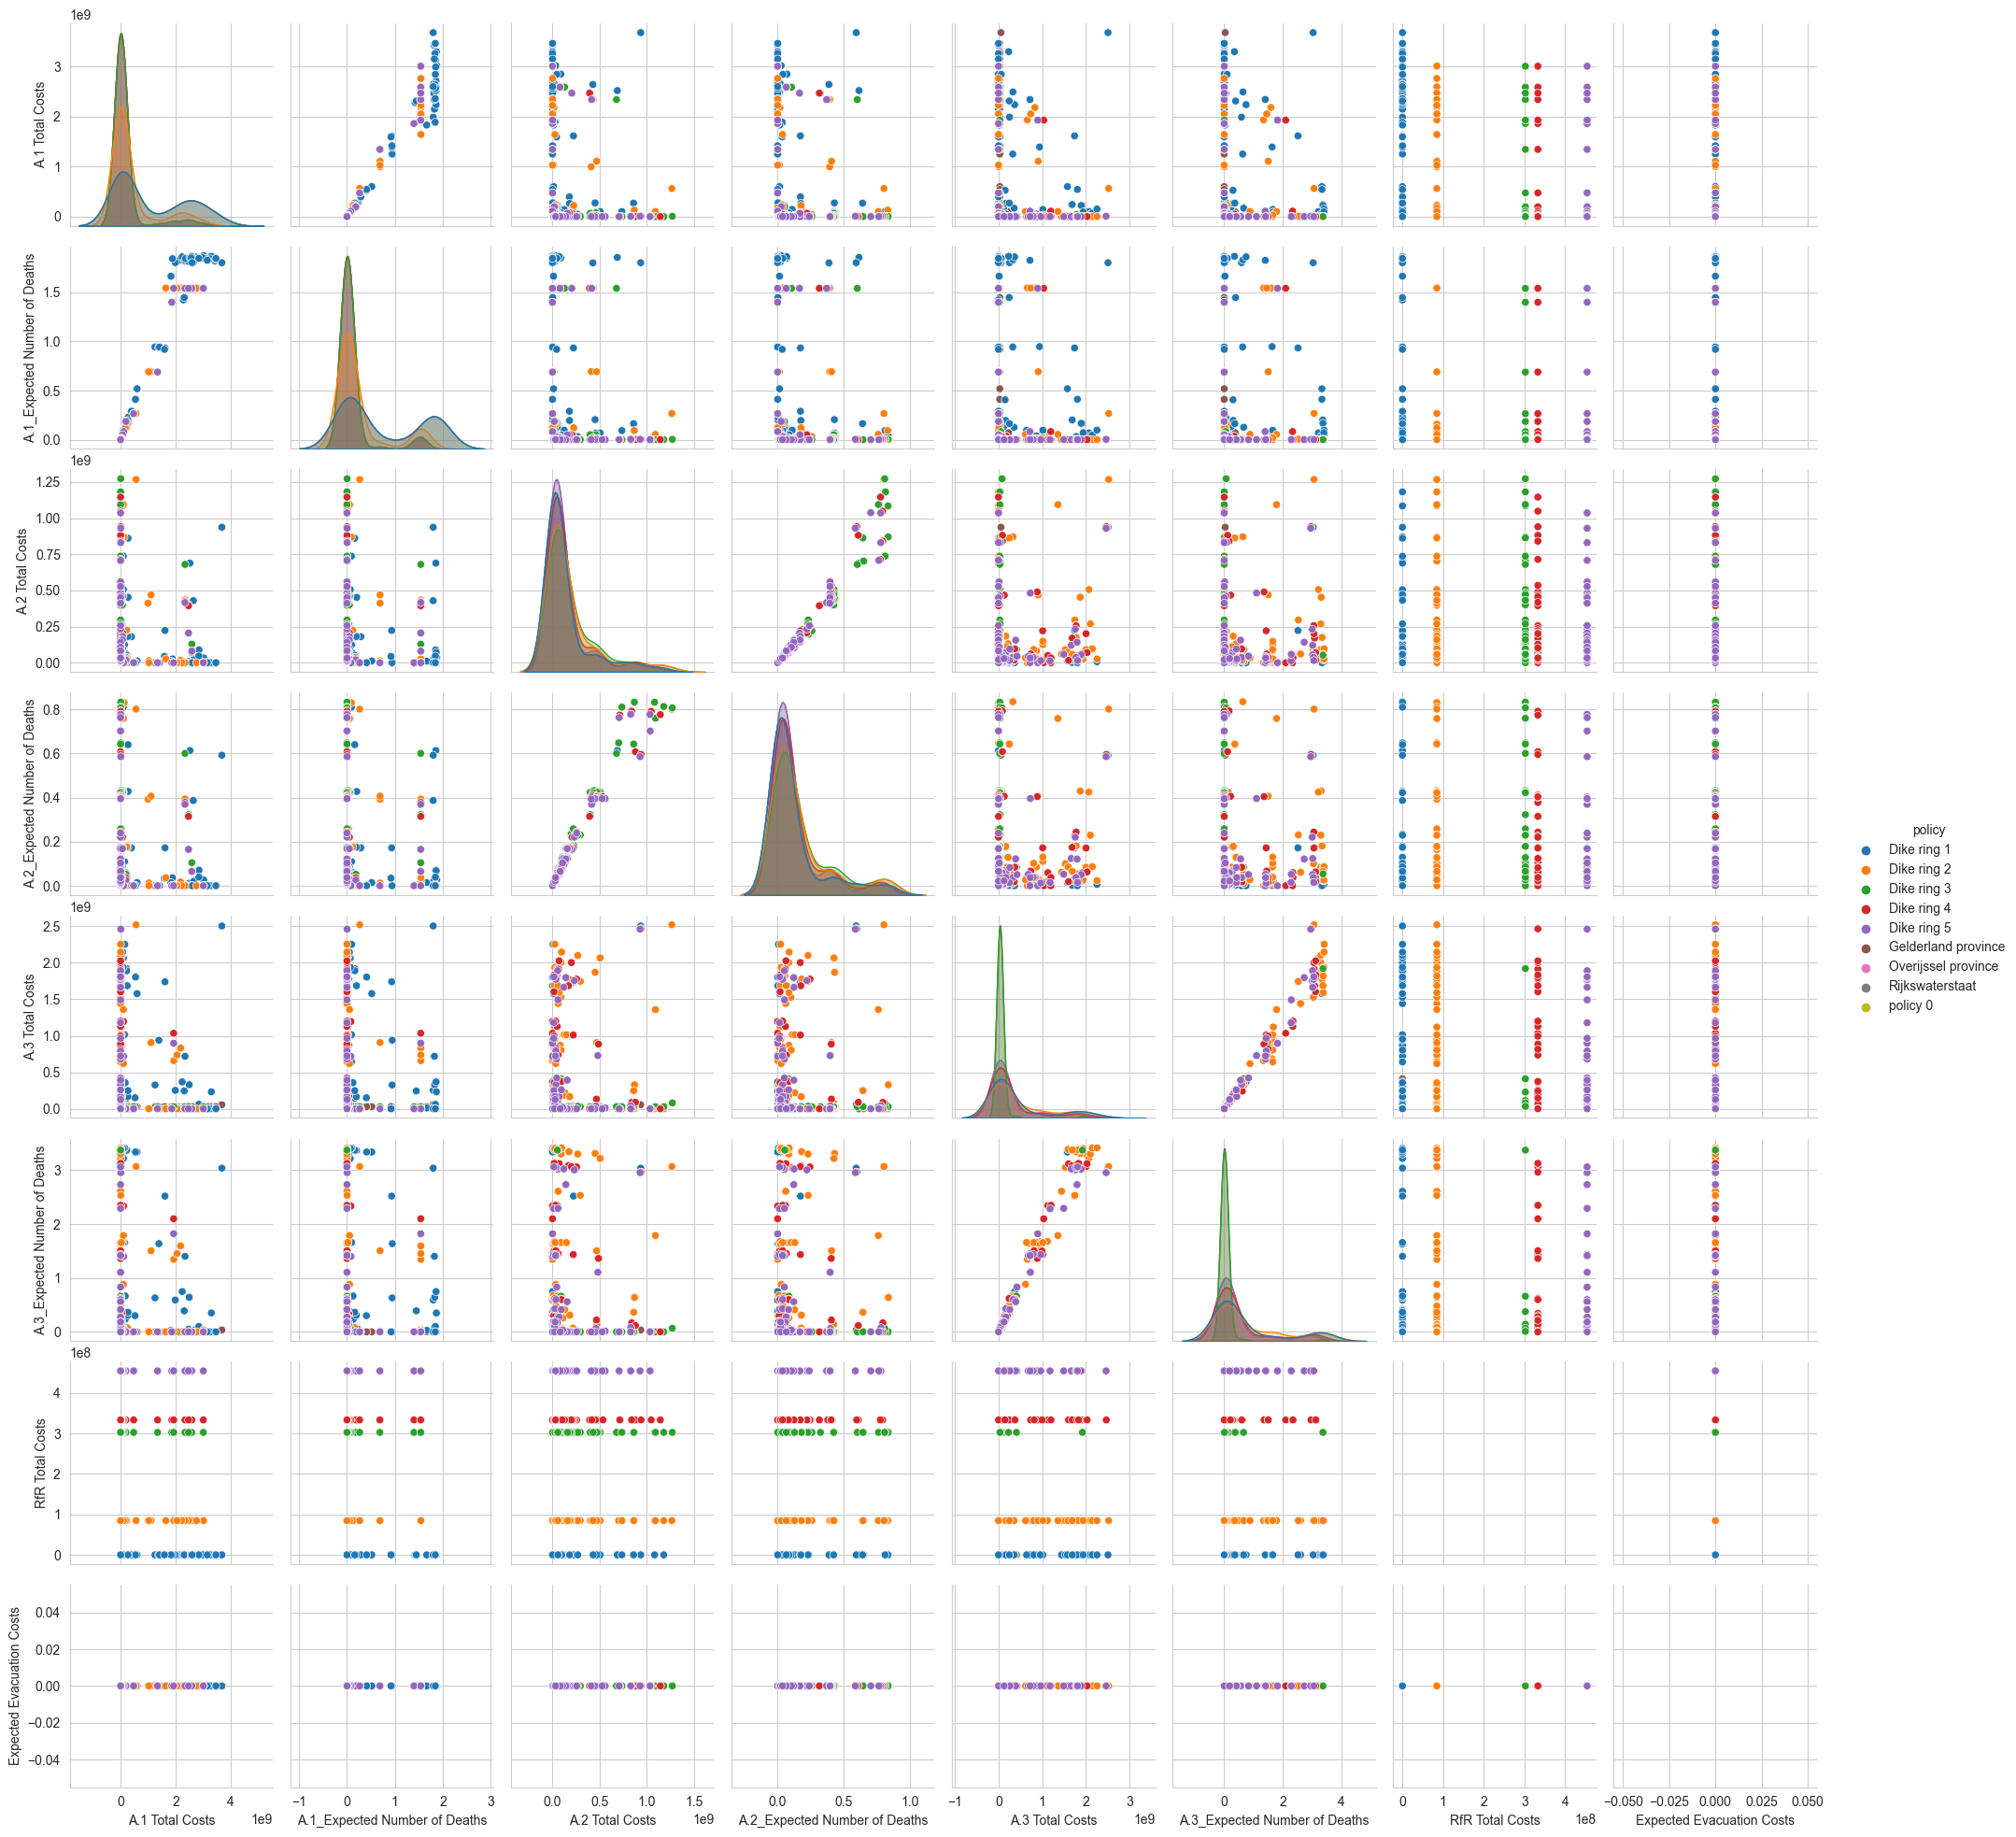

In [21]:
sns.pairplot(upstream, hue='policy', )
plt.show()

In [22]:
downstream = data.loc[:,['A.4 Total Costs', 'A.4_Expected Number of Deaths','A.5 Total Costs','A.5_Expected Number of Deaths','RfR Total Costs','Expected Evacuation Costs','policy']]
downstream

,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,policy 0
1,0.000000e+00,0.000000,1.698948e+08,0.164793,0.0,0.0,policy 0
2,2.867973e+07,0.011629,0.000000e+00,0.000000,0.0,0.0,policy 0
3,3.029535e+07,0.016045,0.000000e+00,0.000000,0.0,0.0,policy 0
4,2.056084e+06,0.001053,1.462209e+08,0.130634,0.0,0.0,policy 0
...,...,...,...,...,...,...,...
895,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
896,4.850905e+07,0.018724,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
897,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5
898,0.000000e+00,0.000000,3.667668e+07,0.000000,454300000.0,0.0,Dike ring 5


In [ ]:
sns.pairplot(downstream, hue='policy', )
plt.show()

What is the impact of each uncertainty to the outcomes? -> Feature scoring

In [ ]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()